# EECS 495 Homwwork 1

## Student: Mingfu Liang

## Student ID: 3146919

## NetID: MLQ4767

## Email: mingfuliang2020@u.northwestern.edu

In [167]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

## A gradient descent and cost function history plotting function 

In [168]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [169]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Chapter 5 Exercises

Complete exercises 2, 6, and 7 from Chapter 5 - make sure to download the most recent version of the text.  Below we load in each dataset.

## Exercise 2

### Solution to 2(a) using Gradient Descent

First we plot the dataset to visualize the data as below, the output figure is the same as Figure 5.13 in Chapter 5:

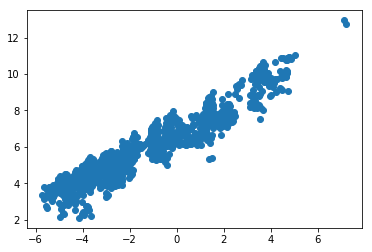

In [170]:
%matplotlib inline
# import statements
datapath = 'datasets/'
from autograd import grad 
from autograd import numpy as np
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# load in dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

# log of the data 
x = np.log(x)
y = np.log(y)

# plot the data and make sure it is the same as the Figure 2 in the Chapter 5
plt.scatter(x,y)
plt.show()

Now we define the linear combination of input points and the Least Squares cost function as below:

In [171]:
# Compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1])
    return a.T

# Implementation of the least squares cost function for linear regression
def least_squares(w):
    # Compute the least squares cost

        cost = np.sum((model(x,w)-y)**2)
        return cost/float(y.size)

g = lambda w: least_squares(w)

Then we define the gradient descent function as below:

In [172]:
# import automatic differentiator to compute gradient module
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we minimize the Least Squares cost funciton by gradient descent as below:

In [173]:
#  Minimizing the LeastSquares costs
alpha_choice = 100**(-1); max_its = 1000; w = np.array([0.0, 0.0]);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

And then we define the cost function history plotter as below:

In [174]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Then we print the optimal parameter of the linear regression as below:

In [175]:
weight_history_1[-1]

array([6.81472336, 0.65280989])

Therefore we know that the $w_{0}$ and $w_{1}$ for this linear regression is:

In [176]:
# The coefficients
print('w1 :',weight_history_1[-1][1])
print('w0 :',weight_history_1[-1][0])

w1 : 0.6528098912807687
w0 : 6.814723362087358


### Solution to 2(b) using Gradient Descent

Base on the result in solution 2(a), we know that the nonlinear relationship between the body mass $x$ and the metabolic rate $y$ is 

\begin{equation}
6.814723362087358 + 0.6528098912807687 * log(x) = log(y)
\end{equation}

### Solution to 2(c) using Gradient Descent

In [177]:
# Calculate how many calories are needed for 10 kg weight
np.exp(6.814723362087358)* np.power(10,0.6528098912807687) * 1000 / 4.18

980009.6707937887

Therefore, based on the fitted line we know that for an animal weighing 10 kg requires 980009.6707937887 calories

### Solution to 2(a) Using Sklearn Package

First we plot the dataset to visualize the data as below, the output figure is the same as Figure 5.13 in Chapter 5:

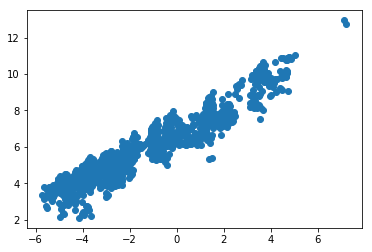

In [178]:
%matplotlib inline
# import statements
datapath = 'datasets/'
from autograd import grad 
from autograd import numpy as np
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# load in dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

# log of the data 
x_train = np.log(x)
y_train = np.log(y)

# plot the data and make sure it is the same as the Figure 2 in the Chapter 5
plt.scatter(x_train,y_train)
plt.show()



Then we use scikit-learn package to fit the linear regression model as below:

In [179]:
# Create Linear Regression object
regr = linear_model.LinearRegression()

# Fit the model using the training sets, remember to transpose the data at first
regr.fit(np.transpose(x_train), np.transpose(y_train))

# The coefficients
print('w1 :',regr.coef_)
print('w0 :',regr.intercept_) 

w1 : [[0.6528121]]
w0 : [6.81473477]


Therefore the optimal parameters of the model is 
\begin{equation}
w_1 = 0.6528121 \\
w_0 = 6.81473477
\end{equation}

### Solution to 2(b) Using Sklearn Package

Base on the result in solution 2(a), we know that the nonlinear relationship between the body mass $x$ and the metabolic rate $y$ is 

\begin{equation}
6.81473477 + 0.6528121 * log(x) = log(y)
\end{equation}

### Solution to 2(c) Using Sklearn Package

In [180]:
# Calculate how many calories are needed for 10 kg weight
np.exp(6.81473477)* np.power(10,0.6528121) * 1000 / 4.18

980025.8348896843

Therefore, based on the fitted line we know that for an animal weighing 10 kg requires 980025.8348896843 calories

## Exercise 6

In [182]:
# load in dataset
csvname = datapath + 'regression_outliers.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:]

First we define the combination of input points and the *Least Squares cost function* for linear regression and *Lesat Absolute Deviations cost function* for linear regression as below:

In [183]:
# Compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1])
    return a.T

# Implementation of the least squares cost function for linear regression
def least_squares(w):
    # Compute the least squares cost
        cost = np.sum((model(x,w)-y)**2)
        return cost/float(y.size)

# Implementation of the least Absolute_Deviations cost function for linear regression
def Absolute_Deviations(w):
    # Compute the least squares cost
        cost = np.sum(abs(model(x,w)-y))
        return cost/float(y.size)
    
g = lambda w: least_squares(w)
g_2 = lambda w: Absolute_Deviations(w)

Then we define the gradient descent function as below:

In [184]:
# import automatic differentiator to compute gradient module
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we minimize the *Least Squares cost function* and *Least Absolute Deviations cost Function* in the same intialization to compare their performance as below:

In [185]:
#  Minimizing the LeastSquares costs
alpha_choice = 10**(-1); max_its = 100; w = np.array([1.0, 1.0]);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

#  Minimizing the LeastAbsoluteDeviation cost 
alpha_choice = 10**(-1); max_its = 100; w = np.array([1.0, 1.0]);
weight_history_1,cost_history_2 = gradient_descent(g_2,alpha_choice,max_its,w)

Now we define the cost function history plotter to visualize the cost histories of two cost function as below:

In [186]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost histories of two cost function in the same canvas, which is the same as $Figure$ 5.7 in Chapter 5:

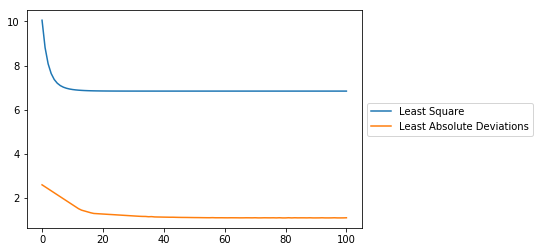

In [187]:
plot_cost_histories([cost_history_1,cost_history_2],labels = [r'Least Square',r'Least Absolute Deviations'])

We can see that the cost function value of the Least Absolute Deviations cost is considerably lower than that of Least Squares.

## Exercise 7

Repeat the experiment outlined in Example 5.7. You can use the implementation described in Section 5.5.3 as a base for your implementation.

In [69]:
# import statements
datapath = 'datasets/'
import autograd.numpy as np 
from autograd import value_and_grad 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# load in dataset
csvname = datapath + 'linear_2output_regression.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:2,:]
y = data[2:,:]

First we visualize the dataset as below:

/anaconda/envs/py35/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/anaconda/envs/py35/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


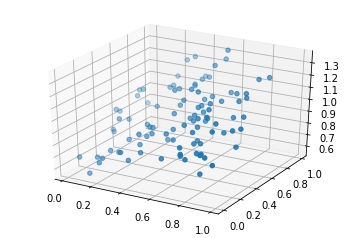

In [70]:
# Visualize the dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y[0], y[1], cmap=plt.hot())
plt.show()

Then we define the linear combination of input point and the least squares cost function for linear regression as below:

In [71]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [72]:
# Implementation of the least squares cost function for linear regression
def least_squares(w):
    # Compute the least squares cost
        cost = np.sum((model(x,w)-y)**2)
        return cost/float(y.size)
    
g = lambda w: least_squares(w)

Now we define the gradient descent function and minimize the least square cost by choosing $\alpha =10^{-1}$, max iteration = 300 and random intialization as below:

In [73]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history


#  Minimizing the LeastSquares costs
alpha_choice = 10**(-1); max_its = 300; w = np.random.randn(3,2);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

Now we can plot the cost history of least squares cost function:

In [74]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

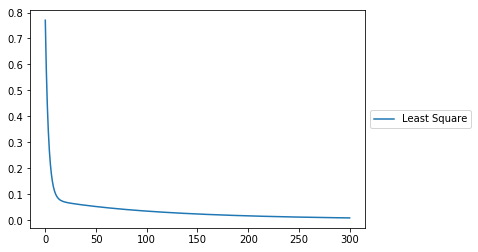

In [75]:
plot_cost_histories([cost_history_1],labels = [r'Least Square'])

Now we print the last step cost history as below:

In [76]:
cost_history_1[-1]

0.008950322143255585

Now we print the the optimal parameter of the linear regression after gradient descent as below:

In [77]:
weight_history_1[-1]

array([[ 0.62658371,  0.24032705],
       [ 0.28675329,  0.33716245],
       [ 0.42051067, -0.7019349 ]])

Now we transpose the optimal parameter in order to get $w_{0}$, $w_{1}$, $w_{2}$ of the hyperplane function:

In [78]:
b = weight_history_1[-1].T

Now we plot the input and one output value in the same canvas as below:

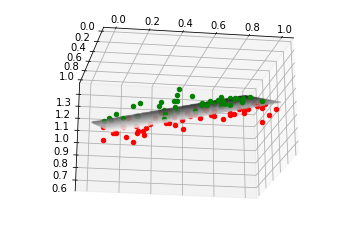

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# define the hyperplane based on one ouput
def plane(x, y):
    result=b[0][1]* x + b[0][2] * y + b[0][0]
    return result
    
mesh_size = np.linspace(0,1,30)

xx,yy = np.meshgrid(mesh_size,mesh_size)

# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx, yy, plane(xx,yy),50,cmap='binary',alpha=0.5)
ax.view_init(-25,260)

for i in range(x.shape[1]):
    if (plane(x[0][i],x[1][i]) - y[0][i] >= 0):
        ax.scatter(x[0][i],x[1][i],y[0][i],c = 'red')
    else:
        ax.scatter(x[0][i],x[1][i],y[0][i],c = 'green')
    
plt.show()

Now we plot the input and the other output value in the same canvas as below:

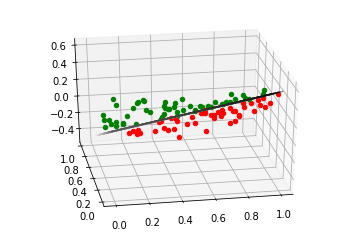

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# define the hyperplane based on the other ouput
def plane(x, y):
    result=b[1][1]* x + b[1][2] * y + b[1][0]
    return result
    
mesh_size = np.linspace(0,1,30)

xx,yy = np.meshgrid(mesh_size,mesh_size)

# plot the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx, yy, plane(xx,yy),50,cmap='binary',alpha=0.5)
ax.view_init(30,260)

for i in range(x.shape[1]):
    if (plane(x[0][i],x[1][i]) - y[1][i] >= 0):
        ax.scatter(x[0][i],x[1][i],y[1][i],c = 'red')
    else:
        ax.scatter(x[0][i],x[1][i],y[1][i],c = 'green')
    
plt.show()

Now we define the multi-output regressions plotter to reproduce the $Figure$ 5.11

In [81]:
# plot multi-output regression dataset with fits provided by 'predictor'
def plot_regressions(x,y,predictor):
    # import all the requisite libs
    # construct panels
    fig = plt.figure(figsize = (9,4))
    ax0 = plt.subplot(121,projection='3d')
    ax0.view_init(25,45)
    ax0.axis('off')

    ax1 = plt.subplot(122,projection='3d')
    ax1.view_init(25,45)
    ax1.axis('off')

    # scatter plot data in each panel
    ax0.scatter(x[0,:],x[1,:],y[0,:],c='k',edgecolor = 'w',linewidth = 1,s=60)
    ax1.scatter(x[0,:],x[1,:],y[1,:],c='k',edgecolor = 'w',linewidth = 1,s=60)

    # construct input for each model fit
    a_ = np.linspace(0,1,10)
    a,b = np.meshgrid(a_,a_)
    a = a.flatten()[np.newaxis,:]
    b = b.flatten()[np.newaxis,:]
    c = np.vstack((a,b))
    
    # add bias term w_0
    bias = np.ones((1,c.shape[1]))
    c = np.vstack((bias,c))
    
    
    # evaluate model 
    p = predictor(c)
    m1 = p[0,:]
    m2 = p[1,:]

    # plot each as surface
    a.shape = (a_.size,a_.size)
    b.shape = (a_.size,a_.size)
    m1.shape = (a_.size,a_.size)
    m2.shape = (a_.size,a_.size)

    ax0.plot_surface(a,b,m1,alpha = 0.1,color = 'lime',cstride = 2,rstride = 2,linewidth = 1,edgecolor ='k')
    ax1.plot_surface(a,b,m2,alpha = 0.1,color = 'lime',cstride = 2,rstride = 2,linewidth = 1,edgecolor ='k')

    plt.show()

Now we can reproduce the $Figure$ 5.11 in Chapter 5 as below: 

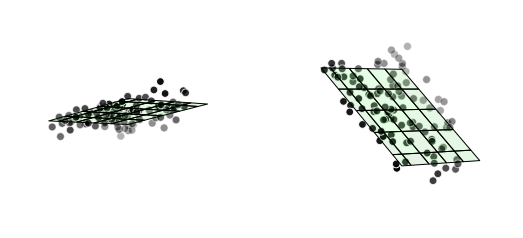

In [82]:
x = data[:2,:]
predicator = lambda w : np.dot(weight_history_1[-1].T,w)
plot_regressions(x,y,predicator)

 # Chapter 6

Complete exercises 7, 8, 9, and 14 from Chapter 6 - make sure to download the most recent version of the text.  Below we load in each dataset.

## Exercise 7

In [204]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np
# load in dataset
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

First we define the linear combination of input point and the conve softmax cost function as below:

In [205]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:]) 
    return a.T

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

g = lambda w: softmax(w)

Then we define the gradient descent function as below:

In [206]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history


Now we can minimize the softmax cost function as below:

In [207]:
#  Minimizing the softmax cost costs

# alpha = 0.1, iteration = 10000
#alpha_choice = 10**(-1); max_its = 10000;w = np.array([3.0,3.0]);
#weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# alpha = 1, iteration = 2000
alpha_choice = 10**(0); max_its = 2000;w = np.array([3.0,3.0]);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

Now we can print the weight of the last step, which represent as the optimal weight parameters after gradient descent:  

In [208]:
weight_history_2[-1]

array([-11.40508017,  10.99794873])

Now we can plot the data point and the regression in the same canvas, which is the same as the left panel of $Figure$ 6.10 in Chapter 6:

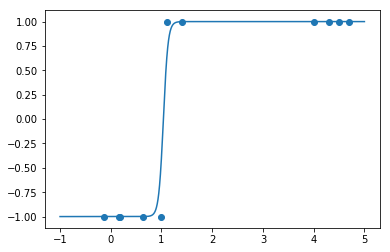

In [209]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)
xx = np.arange(-1,5,.0001)
yy = np.tanh(weight_history_2[-1][1] * xx + weight_history_2[-1][0])
plt.plot(xx,yy)
plt.show()

## Exercise 8

In [210]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np
# load in dataset
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

First we define the linear combination of input point and the *Log Error based Softmax cost function* as below:

In [211]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:]) 
    return a.T

# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the log error based softmax cost function
def log_error_softmax(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    b = sigmoid(- model(x,w))
    
    # compute cost of label -1 points
    ind = np.argwhere(y == -1)[:,1]
    cost= -np.sum(np.log(b[:,ind]))
    
    # compute cost of label 1 points
    ind = np.argwhere(y == 1)[:,1]
    cost -= np.sum(np.log(a[:,ind]))
    
    return cost/y.size

g = lambda w: log_error_softmax(w)

Then we define the gradient descent function to minimize the cost function:

In [212]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we can minimize the *Log Error based Softmax cost funtion*. Here we use the fixed intialization as $w = (0.02060605,-0.20765506,-1.07492087)$ since after parameter tuning, I find that when the intialization is the same as below and the max iteration is 50 and $\alpha = 10^{-1}$, I can make the misclassification number down to 3:

In [213]:
#  Minimizing the log error based softmax cost

# this initalization achieves from parameter tuning and it can make the number of misclassification down to 3
w = np.array([[ 0.02060605],
       [-0.20765506],
       [-1.07492087]])

alpha_choice = 10**(-1); max_its = 50; w;
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

Now we print the intialization parameter to know exactly what intialization has been used in this experiment:

In [214]:
# Confirm the exact value of randomizing w
w

array([[ 0.02060605],
       [-0.20765506],
       [-1.07492087]])

Now we define the trained model quality function to evaluate the performance of model based on the number of misclassifications:

In [215]:
# trained_model_quality function

def trained_model_quality(weight_history,max_its):    
    misclassifications_history = [] # misclassification history container
    for k in range(max_its): # for each step
        num_misclassification = 0
        yhat = np.sign(model(x, weight_history[k]))
        for j in range(len(y.T)): # for each y
            if yhat[0][j] != y[0][j]:# determine whether yhat = y, if not, it means misclassification
                num_misclassification = num_misclassification + 1
        misclassifications_history.append(num_misclassification)
    return misclassifications_history

Now we print the optimal weight after gradient descent as below:

In [216]:
weight_history_1[-1]

array([[-0.22069568],
       [ 0.88740827],
       [-0.9597283 ]])

Now we calculate the misclassification history of each step:

In [217]:
misclassification_history_1 = trained_model_quality(weight_history_1,max_its = 50)

Now we print the misclassification history of each step. In the last line of the output shows that the final step achieves only 3 misclassifications:

In [218]:
misclassification_history_1

[36,
 36,
 36,
 35,
 35,
 34,
 33,
 33,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 27,
 27,
 26,
 25,
 24,
 22,
 22,
 20,
 19,
 19,
 19,
 18,
 17,
 17,
 16,
 16,
 15,
 12,
 12,
 11,
 11,
 11,
 10,
 9,
 9,
 7,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 3]

In order to make sure the misclassification number is correct, we calculate the prediction of $y$ based on the optimal weights which is at the last line of weight_history_1, and then we print out the prediction of $y$ as $\mathop y\limits^ \wedge$ and the groundtrue data $y$ to compare then one by one:

In [219]:
# Calculate the prediction of y as yhat based on the optimal weights parameter
yhat = np.sign(model(x, weight_history_1[-1]))

In [220]:
# Print the prediction of y
yhat

array([[ 1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1., -1.,  1., -1., -1., -1., -1.,  1.]])

In [221]:
# Print the groundtrue of y
y

array([[ 1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1., -1.,  1., -1., -1., -1., -1.,  1.]])

Now we find that where yhat is not equal to y as below and there are only 3 misclassifications:

In [222]:
y[np.where(yhat != y)]

array([-1., -1.,  1.])

Finally we can confirm that based on the initialization and parameters above, the final misclassification can be down to 3, which is less than 5.

## Exercise 9

In [101]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np
# load in dataset
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

First we define the linear combination of input point and *Perceptron cost function* as below:

In [102]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:]) 
    return a.T

# percetron cost funciton
def perceptron_cost(w):
    cost = np.sum(np.maximum(0,-y*model(x,w)))
    return cost/float(np.size(y))

g = lambda w: perceptron_cost(w)

Then we define the gradient descent function as below:

In [103]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we can minimize the cost when $\alpha = 10^{-1}$ and $\alpha = 10^{-2}$. Since we want to compare the performance of these two $\alpha$, we need to use the same max iteration number as 50 and same random intialization as below:

In [104]:
#  Minimizing the costs when alpha = 10^(-1) and alpha = 10^(-2)

'''If you want to reproduce the result as below, used the w = np.array([[-0.1930888 ],
                                                                       [-2.11382325],
                                                                       [-1.6177147 ]])'''

alpha_choice = 10**(-1); max_its = 50;w = np.random.randn(3,1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

alpha_choice = 10**(-2); max_its = 50;w ; # use the same intialization as when alpha = 10^(-1)
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

Now we print the random intialization to know exactly what have been used in this experiment:

In [105]:
w

array([[-0.1930888 ],
       [-2.11382325],
       [-1.6177147 ]])

Then we define the cost function history plotter function in order to visualize the cost histories of each $\alpha$

In [106]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost histories of $\alpha = 10^{-1}$ and $\alpha = 10^{-2}$ as follow:

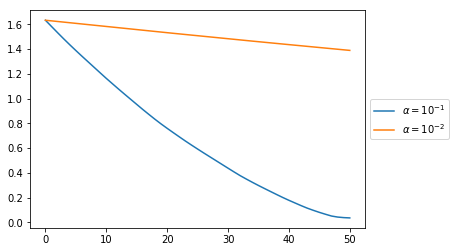

In [107]:
plot_cost_histories([cost_history_1,cost_history_2],labels = [r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])

We can see that when $\alpha = 10^{-1}$, the cost function converge much faster.

Then we define the trained model quality evaluation function as below, which is based on the misclassification number of each step:

In [108]:
def trained_model_quality(weight_history,max_its):    
    misclassifications_history = [] # misclassification history container
    
    # run the each step misclassification calculation loop
    for k in range(max_its): # for each step
        num_misclassification = 0
        yhat = np.sign(model(x, weight_history[k]))
        for j in range(len(y.T)): # for each y
            if yhat[0][j] != y[0][j]: # determine whether yhat = y, if not, it means misclassification
                num_misclassification = num_misclassification + 1
            else:
                continue
        misclassifications_history.append(num_misclassification)
    return misclassifications_history


Now we can get the misclassification histories of each step when $\alpha = 10^{-1}$ and $\alpha = 10^{-2}$ as below:

In [109]:
# Calculate the misclassification history of each step when alpha = 10^(-1)
misclassification_history_1 = trained_model_quality(weight_history_1,max_its = 50)

# Calculate the misclassification history of each step when alpha = 10^(-2)
misclassification_history_2 = trained_model_quality(weight_history_2,max_its = 50)

Now we can print out the misclassification histories of each step when $\alpha = 10^{-1}$ and $\alpha = 10^{-2}$ as below:

In [110]:
# print the misclassification history of each step when alpha = 10^(-1)
misclassification_history_1

[58,
 58,
 58,
 57,
 55,
 55,
 54,
 54,
 54,
 54,
 52,
 52,
 51,
 52,
 52,
 52,
 51,
 51,
 49,
 48,
 47,
 46,
 46,
 45,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 42,
 40,
 39,
 38,
 37,
 36,
 36,
 35,
 34,
 33,
 33,
 32,
 32,
 30,
 29,
 29,
 24,
 19,
 15]

In [111]:
# print the misclassification history of each step of alpha = 10^(-2)
misclassification_history_2

[58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55]

Now we define the misclassification histories visualization function as below:

In [112]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_misclassification_histories(misclassification_history,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(misclassification_history)):
        history = misclassification_history[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the misclassification histories of $\alpha = 10^{-1}$ and $\alpha = 10^{-2}$ as follow:

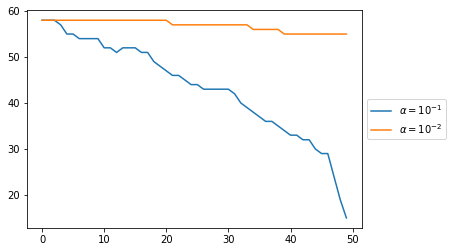

In [113]:
plot_misclassification_histories([misclassification_history_1,misclassification_history_2],labels = [r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])

Based on the cost function histories and misclassification histories, when $\alpha = 10^{-1}$,it achieves perfect classification first.

## Exercise 14

In [58]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np
# load in dataset
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 

First we define the linear combination of input point and the *Softmax cost function* and *Preceptron cost function* as below:

In [59]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:]) 
    return a.T

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# the perceptron cost function
def perceptron_cost(w):
    cost = np.sum(np.maximum(0,-y*model(x,w)))
    return cost/float(np.size(y))

g = lambda w: softmax(w)
g_1 = lambda w: perceptron_cost(w)

Then we define the gradient descent function for minimizing cost function as below:

In [60]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

Now we can use the gradient descent function to minimize the *Softmax cost function* and *Perceptron cost function* and get the weight history and cost history of each step. We assume that they share the same $\alpha = 0.01$, max iteration is 2000 and random intialization.

In [61]:
#  Minimizing the softmax cost function
alpha_choice = 100**(-1); max_its = 2000;w = np.random.randn(9,1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# Minimizing the perceptron cost function
alpha_choice = 100**(-1); max_its = 2000;w ;# use the same intialization as softmax cost function
weight_history_2,cost_history_2 = gradient_descent(g_1,alpha_choice,max_its,w)

Now we print the random intialization to know exactly what have been used in this experiment:

In [62]:
w

array([[ 0.07885186],
       [-0.65684905],
       [-1.37711905],
       [-0.18037947],
       [ 0.4820285 ],
       [-1.16679047],
       [-0.34759846],
       [ 0.92350483],
       [-1.43208138]])

Then we define the cost histories plot function in order to visualize the cost history as below:

In [63]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost histories of *Softmax cost function* and *Perceptron cost function* as below:

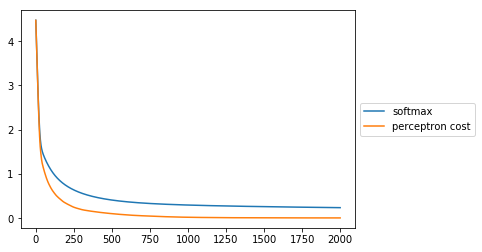

In [64]:
plot_cost_histories([cost_history_1,cost_history_2],labels = [r'softmax',r'perceptron cost'])

Then we define the trained model quality evaluation function as below, which is based on the misclassification number of each step:

In [65]:
def trained_model_quality(weight_history,max_its):    
    misclassifications_history = [] # misclassification history container
    
    # run the each step misclassification calculation loop
    for k in range(max_its): # for each step
        num_misclassification = 0
        yhat = np.sign(model(x, weight_history[k]))
        for j in range(len(y.T)): # for each y
            if yhat[0][j] != y[0][j]: # determine whether yhat = y, if not, it means misclassification
                num_misclassification = num_misclassification + 1
            else:
                continue
        misclassifications_history.append(num_misclassification)
    return misclassifications_history

Then we can calculate the misclassifcation history of each cost function as below:

In [66]:
# Calculate the misclassification history of softmax cost function
misclassification_history_1 = trained_model_quality(weight_history_1,max_its = 2000)

# Calculate the misclassification history of perceptron cost function
misclassification_history_2 = trained_model_quality(weight_history_2,max_its = 2000)

Now, we print the minimal number of misclassification number of each cost functions as below:

In [72]:
# The last step of softmax cost misclassification number
print('The minimal misclassification number of softmax cost function on last step is :',misclassification_history_1[-1])

The minimal misclassification number of softmax cost function on last step is : 45


In [74]:
# The last step of precetron cost misclassification number
print('The minimal misclassification number of perceptron cost function on last step is :',misclassification_history_2[-1])

The minimal misclassification number of perceptron cost function on last step is : 28


Therefore, we can see that the minimal misclassification number of *Perceptron cost function* is less than the one of softmax cost function. Now we define the misclassification histories visualization function as below:

In [69]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_misclassification_histories(misclassification_history,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(misclassification_history)):
        history = misclassification_history[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the misclassification histories of *Softmax cost function* and *Perceptron cost function* as below:

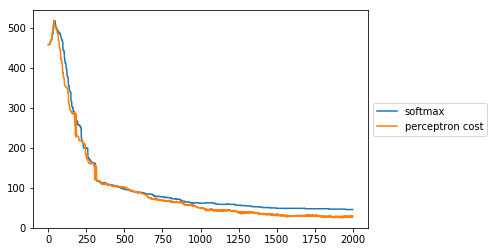

In [70]:
plot_misclassification_histories([misclassification_history_1,misclassification_history_2],labels = [r'softmax',r'perceptron cost'])

Therefore, based on the cost and misclassification histories of softmax and perceptron cost function, we can see that *Perceptron cost function* achieves less number of misclassification than *Softmax cost function*, which means that the efficacy of *Perceptron cost function* is better.